In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster import hierarchy
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd = pd.read_csv(r"C:\Users\surya\Downloads\crime_data.csv")

In [3]:
cd.loc[:,'Total'] = cd.sum(numeric_only=True, axis=1)
cd.head()

,City,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


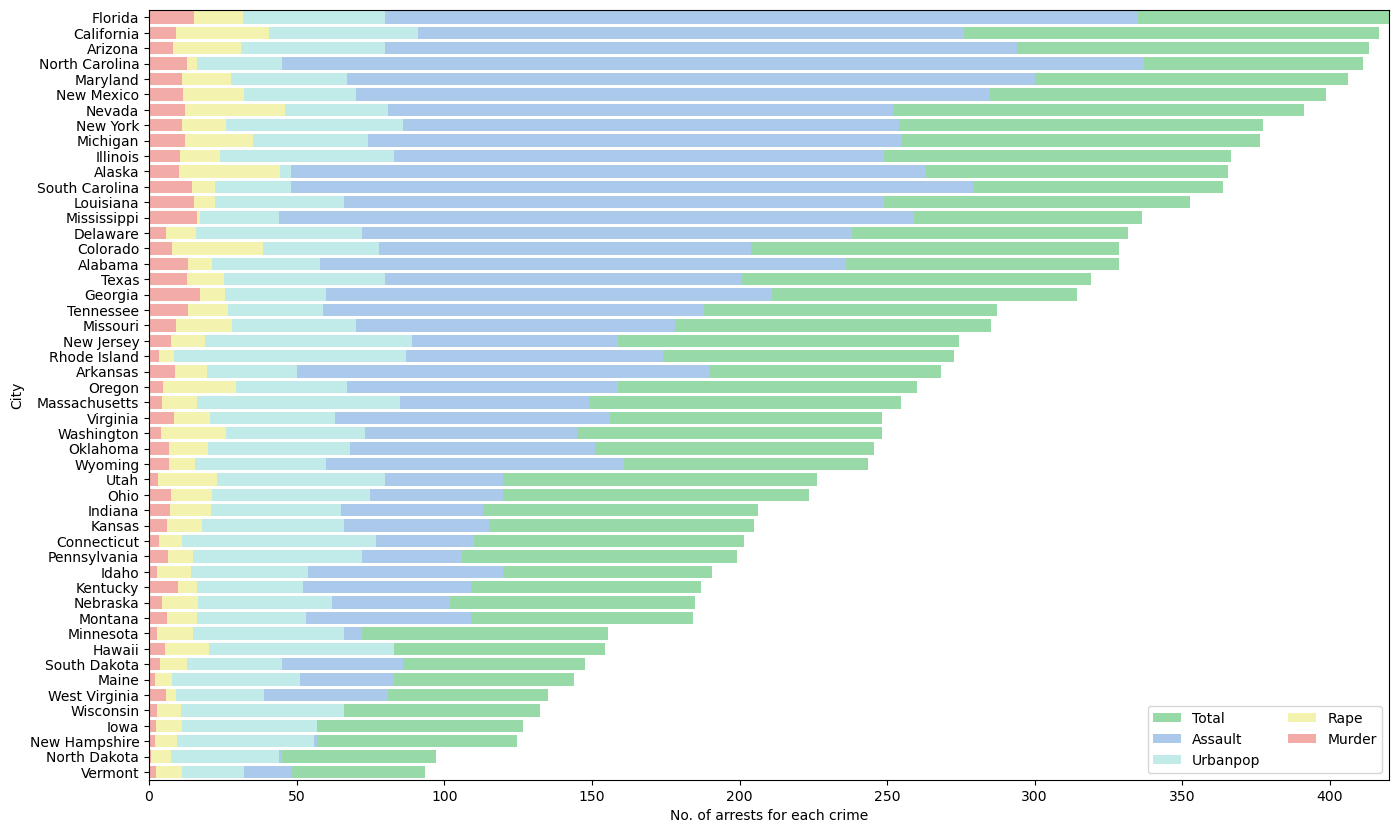

In [4]:
f, ax = plt.subplots(figsize=(16, 10))

stats = cd.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="UrbanPop", y="City", data=stats,
            label="Urbanpop", color="c")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")


sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 420), ylabel="City",
       xlabel="No. of arrests for each crime");

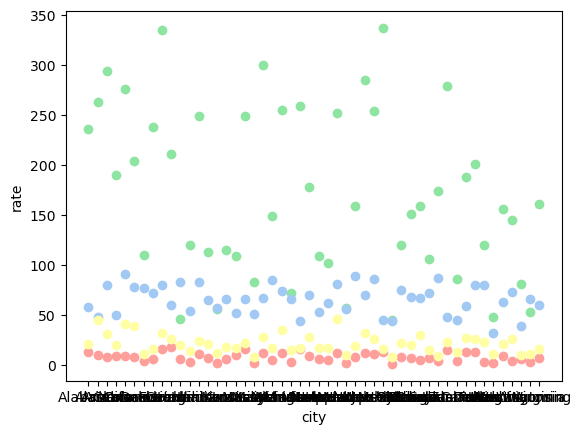

In [5]:
plt.scatter(cd.City, cd.Murder, color='r')
plt.scatter(cd.City, cd.Assault, color='g')
plt.scatter(cd.City, cd.UrbanPop, color='b')
plt.scatter(cd.City, cd.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [6]:
Scaler = MinMaxScaler()

In [7]:
X = cd[['Murder','Assault','UrbanPop','Rape']]
Scaled_data = Scaler.fit_transform(X)

In [25]:
X=pd.DataFrame(Scaled_data)

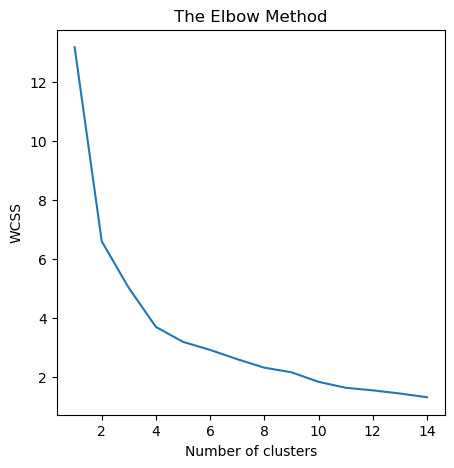

In [9]:
plt.figure(figsize=(5, 5))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
KM1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y=KM1.fit_predict(X)

In [11]:
y_km1=y+1
cluster = list(y_km1)

In [12]:
X['KMeans']=cluster

<Axes: xlabel='Murder', ylabel='Assault'>

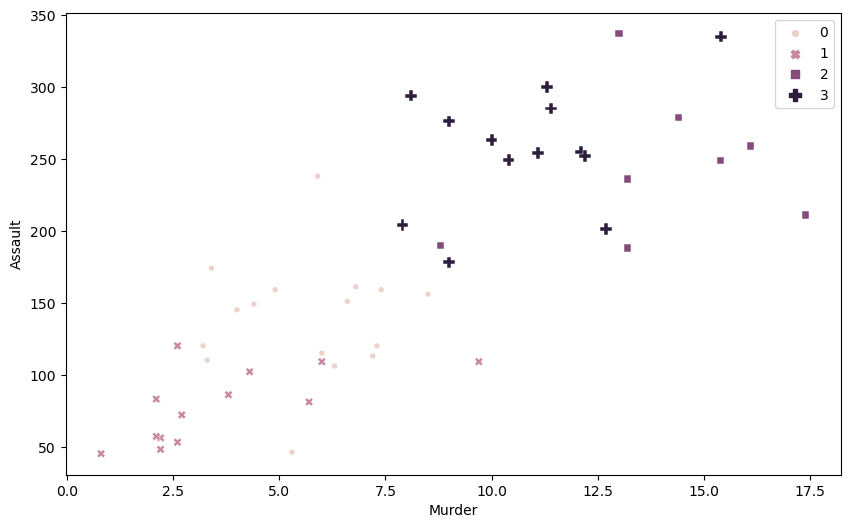

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=cd['Murder'], y = cd['Assault'],hue=y, style=y, size=y)

<Axes: xlabel='Assault', ylabel='Rape'>

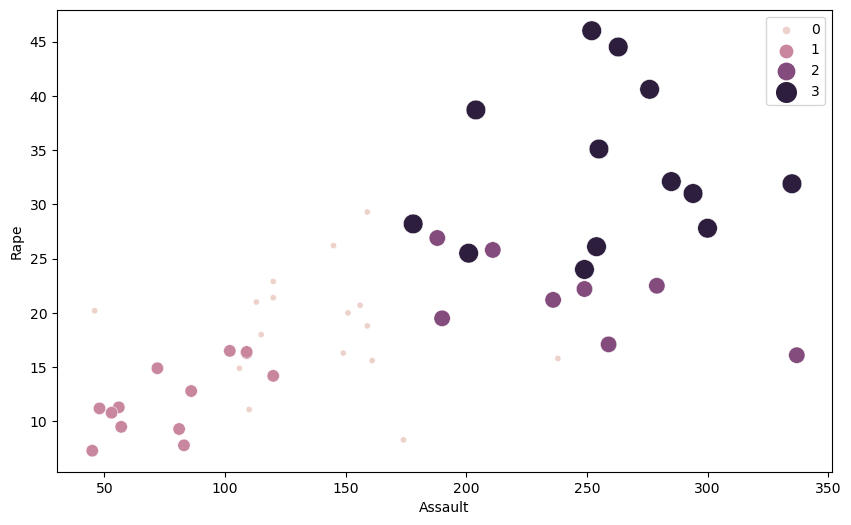

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=cd['Assault'], y = cd['Rape'],hue=y, size=y, sizes=(20,200))

<Axes: xlabel='Murder', ylabel='Rape'>

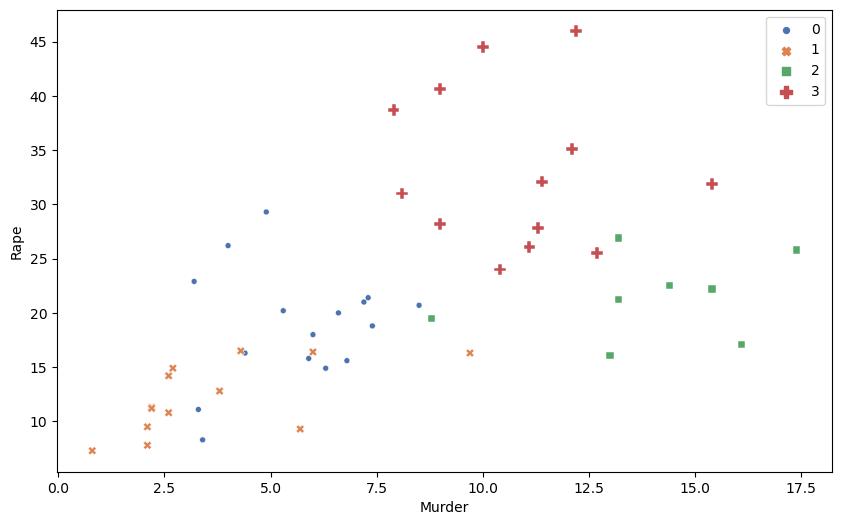

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=cd['Murder'], y = cd['Rape'],hue=y, style=y, size=y, palette="deep")

### DBSCAN

In [16]:
DBS = DBSCAN(eps=0.45,min_samples=20)

In [26]:
y1 = DBS.fit_predict(X)

In [27]:
y1

array([ 0, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [28]:
X['DB']=y1

<Axes: xlabel='Murder', ylabel='Assault'>

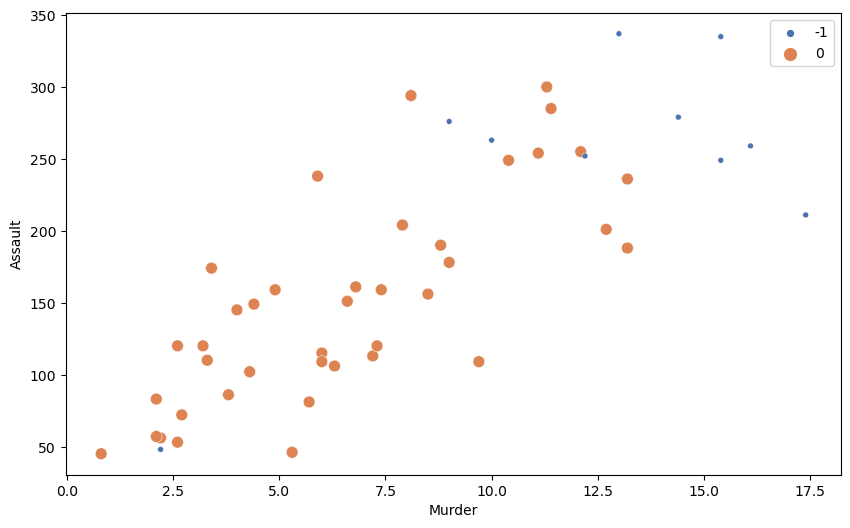

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=cd['Murder'], y = cd['Assault'],hue=y1, size=y1, palette="deep")

+ We can observe that murder and assaults are highly correlated. This tells us that if murders increase the assaults also increase.

+ It is same like murders and rapes, in some cities murder ratio is low, and then rape ratio is also low and vice versa.